In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/train_storming_round.csv')
df.head

<bound method NDFrame.head of        row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0           1   455ca878         45         2/1/2021                9/1/2023   
1           2   c823ce77         48         4/1/2022                2/1/2024   
2           3   62154055         53         5/1/2020                9/1/2023   
3           4   c58bfa6e         44         7/1/2019                3/1/2022   
4           5   b1e5f770         20         9/1/2020                2/1/2023   
...       ...        ...        ...              ...                     ...   
15303   15304   d3b44e44         43         4/1/2019               10/1/2023   
15304   15305   0b1d7054         28         9/1/2022                3/1/2024   
15305   15306   51321fa2         45         1/1/2021                4/1/2024   
15306   15307   dd4a0d2d         25        12/1/2021               12/1/2023   
15307   15308   393f3bf6         53         1/1/2023                2/1/2024   

      yea

In [37]:
df.shape

(15308, 23)

In [38]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12  unique_quotations_last_21_days  

None

In [39]:
df.isnull().sum()

row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

In [40]:
display(df.describe)

<bound method NDFrame.describe of        row_id agent_code  agent_age agent_join_month first_policy_sold_month  \
0           1   455ca878         45         2/1/2021                9/1/2023   
1           2   c823ce77         48         4/1/2022                2/1/2024   
2           3   62154055         53         5/1/2020                9/1/2023   
3           4   c58bfa6e         44         7/1/2019                3/1/2022   
4           5   b1e5f770         20         9/1/2020                2/1/2023   
...       ...        ...        ...              ...                     ...   
15303   15304   d3b44e44         43         4/1/2019               10/1/2023   
15304   15305   0b1d7054         28         9/1/2022                3/1/2024   
15305   15306   51321fa2         45         1/1/2021                4/1/2024   
15306   15307   dd4a0d2d         25        12/1/2021               12/1/2023   
15307   15308   393f3bf6         53         1/1/2023                2/1/2024   

     

In [41]:
df['year_month'] = pd.to_datetime(df['year_month'], errors='coerce')
df['agent_join_month'] = pd.to_datetime(df['agent_join_month'], errors='coerce')
df['first_policy_sold_month'] = pd.to_datetime(df['first_policy_sold_month'], errors='coerce')

In [42]:
df = df.sort_values(['agent_code', 'year_month'])
df['next_month_policy_count'] = df.groupby('agent_code')['new_policy_count'].shift(-1)
df['target'] = df['next_month_policy_count'].apply(lambda x: 1 if x == 0 else 0)
df = df.dropna(subset=['next_month_policy_count'])
df[['agent_code', 'year_month', 'new_policy_count', 'next_month_policy_count', 'target']].head()

,agent_code,year_month,new_policy_count,next_month_policy_count,target
8,003c1999,2023-01-01,0,31.0,0
958,003c1999,2023-02-01,31,27.0,0
1761,003c1999,2023-03-01,27,22.0,0
2577,003c1999,2023-04-01,22,20.0,0
2708,003c1999,2023-05-01,20,0.0,1


In [48]:
# Summary Stats
selected_columns = ["agent_age", "unique_proposals_last_7_days", "unique_proposals_last_15_days", "unique_proposals_last_21_days", "unique_proposal", "unique_quotations_last_7_days", "unique_quotations_last_21_days", "unique_quotations_last_15_days", "unique_quotations", "unique_customers_last_7_days", "unique_customers_last_15_days", "unique_customers_last_21_days", "unique_customers", "new_policy_count", "ANBP_value", "net_income", "number_of_policy_holders", "number_of_cash_payment_policies"]
summary_stats = df[selected_columns].describe()

display(summary_stats)

,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_21_days,unique_quotations_last_15_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,14403.000000,1.440300e+04,1.440300e+04,14403.000000,14403.000000
mean,40.587655,1.494411,2.987989,10.046102,17.513921,1.994029,4.473998,2.997639,13.933903,2.998681,4.996320,7.498160,15.493161,20.254391,1.025922e+06,2.284921e+05,30.954732,101.105325
std,11.688001,1.119207,2.005251,6.031921,6.605452,1.423840,2.874028,2.001317,4.664118,1.645903,2.437624,3.467354,4.539371,9.535919,8.052073e+05,1.739851e+05,24.581692,75.296406
min,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,31.000000,0.000000,1.000000,5.000000,12.000000,1.000000,2.000000,1.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.470870e+05,9.310050e+04,12.000000,38.000000
50%,41.000000,1.000000,3.000000,10.000000,17.000000,2.000000,4.000000,3.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.043500e+05,1.902560e+05,28.000000,90.000000
75%,51.000000,2.000000,5.000000,15.000000,23.000000,3.000000,7.000000,5.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560711e+06,3.228050e+05,48.000000,152.000000
max,60.000000,3.000000,6.000000,20.000000,34.000000,4.000000,9.000000,6.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,369.000000


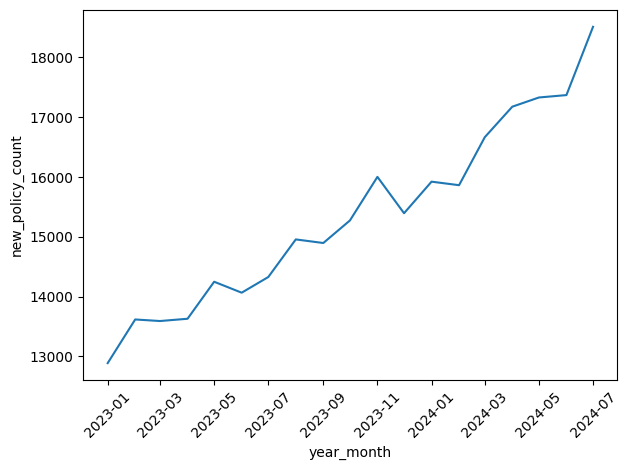

In [57]:
# how monthly sales went

monthly_sales = df.groupby('year_month')['new_policy_count'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='year_month', y='new_policy_count')
plt.xticks(rotation=45)
plt.tight_layout()


In [64]:
# how monthly sales went
monthly_sales['rolling_avg'] = monthly_sales['new_policy_count'].rolling(window=3).mean()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

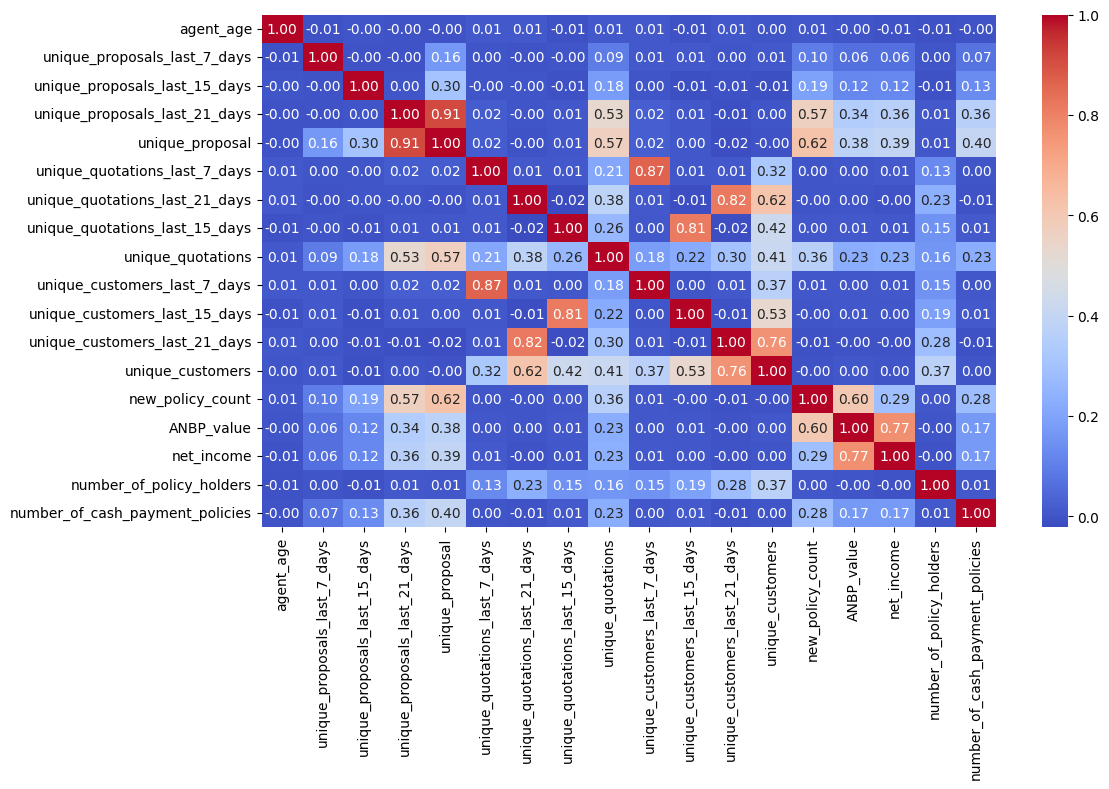

In [61]:
#check if numerical correlation exists between the features
plt.figure(figsize=(12, 8))
numerical_df = df[selected_columns]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.tight_layout()